Привет! В этом проекте я бы хотела сделать проект на довольно ненаучную тему - астрологию. Дело в том, что есть те, [кто](https://www.livemint.com/Sundayapp/zDSjhU5IzcuI7ypo6W4WtL/Why-data-science-is-simply-the-new-astrology.html) считает, что data science is simply the new astrology, и я бы хотела проверить совместимость астрологии и data science в своем проекте. Моя цель - показать наглядно, что "незыблемые истины", которые можно найти в различных астрологических сайтах, на данных не проверяются. \\
Ну, и конечно, в конце я подготовила для вас самый научный гороскоп на сегодня!

Основной вопрос: влияет ли знак зодиака на жизнь человека?
Мой план на проект - проверить ключевые показатели жизни людей на зависимость от знака зодиака: \\
1. Партнер. Астрологи всегда предсказывают, что есть более и менее совместимые знаки зодиака. Мы проверим на основе статистики разводов и знаков зодиака разводящихся, есть ли какая-то тенденция между знаком зодиака партнера и успехом отношений.
2. Уровень счастья. Влияет ли знак зодиака на то, счастливы мы или нет? Я смотрю на современные данные - предсказания гороскопов для лета 2022 года. Астрологи всегда предсказывают на какой-то период (месяц\год\полгода\квартал) разную степень успеха и уровень "удачливости" для каждого знака зодиака. Если они правы, то мы заметим на данных гороскопов на неделю, что какие-то знаки зодиака более счастливые в этот период, а какие-то - менее.
3. Продолжительность жизни, причина смерти, профессия. На данных знаменитостей проверим, есть ли связь между знаком зодиака и показателями выше. 

Таким образом, мы затронем важные аспекты жизни человека и сможем сделать вывод о том, проверяются ли гипотезы астрологии на реальных данных. И наконец, узнаем, какой гороскоп предначертан звездами вам сегодня.

In [79]:
%pip install --upgrade bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
from bs4 import BeautifulSoup
import requests

# horoscope: сходимость знаков зодиака

Начнем с совместимости знаков зодиаков партнеров. У нас есть [датасет](https://www.kaggle.com/datasets/anshulmehtakaggl/dailyhoroscope-dataset), который предоставляет еженедельный гороскоп для всех знаков зодиака, с конца июня 2022 года. В датасете есть столбец 'mood', отвечающий за настроение знака зодиака на данную неделю, столбец 'compatibility', отвечающий за знак зодиака, особенно подходящий для данного знака 'sign' на этой неделе. 

Этот датасет будет базовым, поэтому будет называться df.

В данной части мы узнаем частоту (уровень) совместимостей всех знаков зодиаков на этом датасете и проверим, будет ли отражена такая зависимость на данных другого [датасета](https://www.kaggle.com/datasets/aagghh/divorcemarriage-dataset-with-birth-dates) - в нем содержится информация о  разводах с 2000 по 2015 год в городе Xalapa, Mexico.





In [81]:
import pandas as pd

In [82]:
df = pd.read_csv('horoscope.csv')

In [83]:
df_graph = df[['compatibility', 'sign']]
df_graph
def to_lower(s):
    return s.lower()

# применяем функцию ко всем ячейкам датафрейма
df_graph = df_graph.applymap(to_lower)


In [84]:
import networkx as nx

In [85]:
# технический код, создаем словарь edge_freq, показывающий, сколько пар (знак зодиака, знак зодиака) есть в датафрейме 
lst = [[row['compatibility'], row['sign']] for i, row in df_graph.iterrows()]
edge_freq = {}
for (frm, to) in lst:
    if (frm, to) not in edge_freq:
        edge_freq[(frm, to)] = 0
    edge_freq[(frm, to)] += 1

In [86]:
wikigraph = nx.DiGraph([(frm, to) for (frm, to) in df_graph.values])

In [87]:
%pip install mpatches

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mpatches (from versions: none)
ERROR: No matching distribution found for mpatches


<ipython-input-88-c22348539e3b>:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


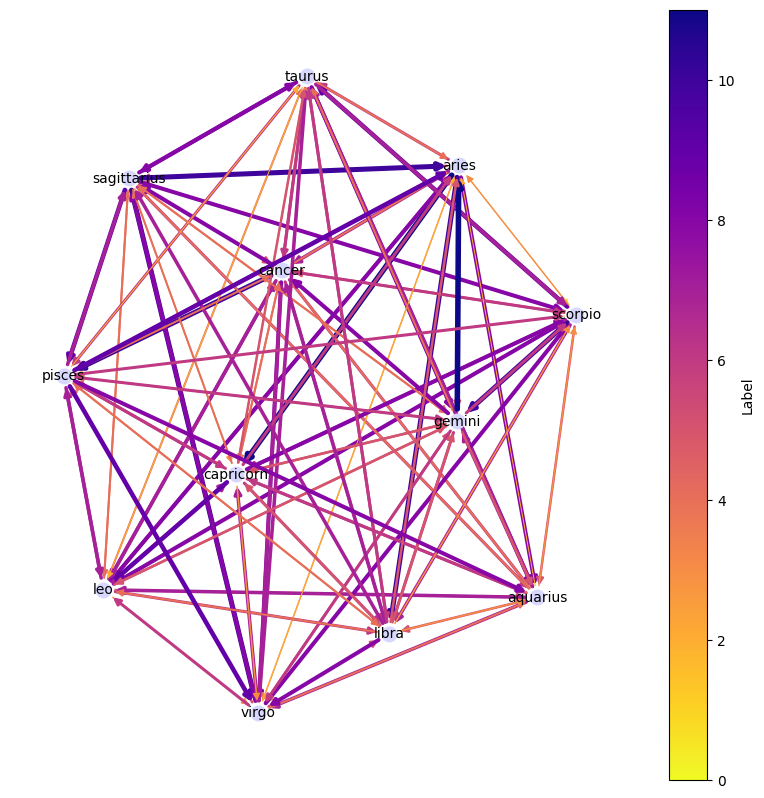

In [88]:
import networkx as nx
df_graph = df[['compatibility', 'sign']]
df_graph
def to_lower(s):
    return s.lower()

# применяем функцию ко всем ячейкам датафрейма
df_graph = df_graph.applymap(to_lower)


wikigraph = nx.DiGraph([(frm, to) for (to, frm) in df_graph.values])
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

lst = [[row['compatibility'], row['sign']] for i, row in df_graph.iterrows()]
edge_freq = {}
for (frm, to) in lst:
    if (frm, to) not in edge_freq:
        edge_freq[(frm, to)] = 0
    edge_freq[(frm, to)] += 1
#print(edge_freq)
cmap = plt.get_cmap("plasma")
cmap = cmap.reversed()
max_freq = max(edge_freq.values())
edge_colors = [cmap(edge_freq.get(edge, 0)/max_freq) for edge in wikigraph.edges()] # создаем список цветов для каждого ребра
edge_widths = [4 * edge_freq[edge] / max_freq for edge in wikigraph.edges()] # создаем список толщин для каждого ребра 

plt.figure(figsize=(10,10))
pos = nx.spring_layout(wikigraph, seed=42)

nx.draw_networkx_nodes(wikigraph, pos, node_color='#d8d8ff', node_size=110)
nx.draw_networkx_edges(wikigraph, pos, edge_color=edge_colors, #'#d8d8ff',
                       edge_cmap=cmap, edge_vmin=0, edge_vmax=max_freq,  width=edge_widths)
nx.draw_networkx_labels(wikigraph, pos, font_size=10)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_freq))
sm.set_array([])

# создать легенду
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Label')
cbar.set_label('Label')
plt.axis("off")
plt.show()

Таким образом, мы создали граф, который наглядно показывает, насколько каждый знак зодиака с другим совместим. Для этого я делаю различную раскраску графов и различную толщину. 

In [89]:
matrix = df.pivot_table(index='compatibility', columns='sign',
                        values='date_range', aggfunc='count', fill_value=0)
matrix
# Создаём матрицу, которая также наглядно показывает, сколько было пар (знак - совместимый ему знак) в датасете


sign,aquarius,aries,cancer,capricorn,gemini,leo,libra,pisces,sagittarius,scorpio,taurus,virgo
compatibility,,,,,,,,,,,,
Aquarius,0,2,4,6,7,7,5,4,4,3,7,7
Aries,8,0,7,11,5,7,10,7,5,1,6,3
Cancer,6,4,0,4,4,7,6,10,8,6,6,8
Capricorn,6,6,4,0,5,9,6,6,4,8,5,3
Gemini,5,11,8,5,0,5,6,4,4,6,4,6
Leo,5,8,7,7,5,0,6,7,4,8,4,3
Libra,3,5,7,5,5,4,0,4,7,3,6,8
Pisces,8,9,4,6,6,7,4,0,7,6,2,9
Sagittarius,6,10,5,3,4,4,3,9,0,8,8,10


['Aquarius' 'Aries' 'Cancer' 'Capricorn' 'Gemini' 'Leo' 'Libra' 'Pisces'
 'Sagittarius' 'Scorpio' 'Taurus' 'Virgo']


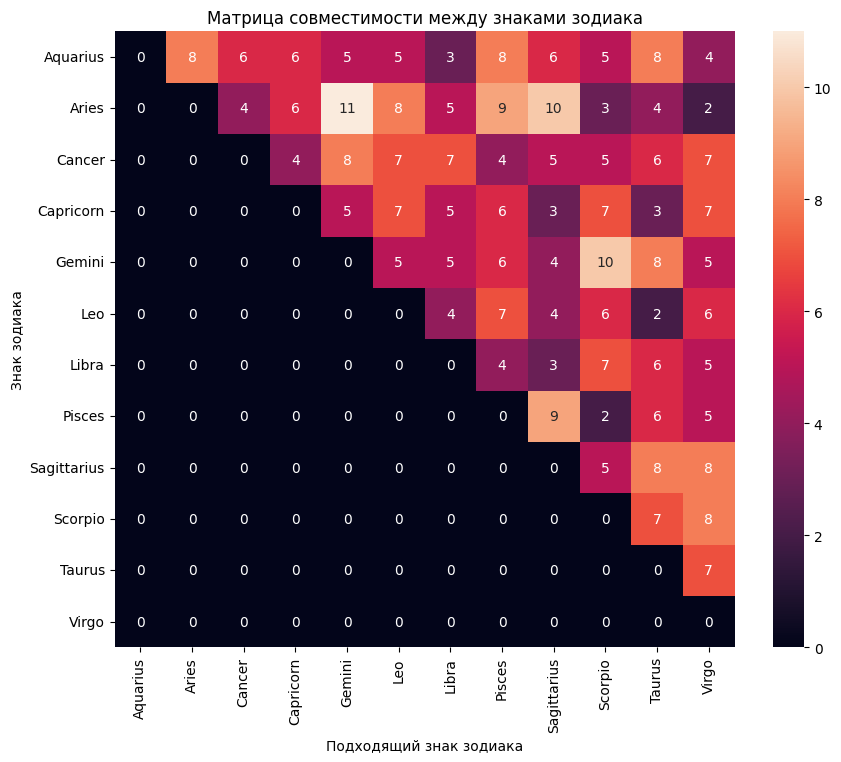

In [90]:
import numpy as np
zodiac_signs = np.unique(df[['compatibility']])
print(zodiac_signs)
# создаем пустую матрицу корреляции
corr_matrix = np.zeros((len(zodiac_signs), len(zodiac_signs)))


for i, sign1 in enumerate(zodiac_signs):
    for j, sign2 in enumerate(zodiac_signs):
        if i <= j:  # заполняем только верхнюю диагональ
            temp_df = df[(df['sign'] == sign1.lower()) & (df['compatibility'] == sign2)]
            corr = int(temp_df.count()[0])
            corr_matrix[i, j] = corr    
# заполняем нижнюю диагональ, зеркально отражая верхнюю диагональ
corr_matrix += np.tril(corr_matrix, -1).T

import matplotlib.pyplot as plt
import seaborn as sns

# создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=zodiac_signs, yticklabels=zodiac_signs, annot=True)
plt.title('Матрица совместимости между знаками зодиака')
plt.xlabel('Подходящий знак зодиака')
plt.ylabel('Знак зодиака')
plt.show()

df_corr = pd.DataFrame(corr_matrix, columns=zodiac_signs, index=zodiac_signs)

# используем метод stack()
df_stacked = df_corr.stack().reset_index()

# задаем названия колонок
df_stacked.columns = ['X', 'Y', 'correlation']

# выводим полученный датафрейм

n = corr_matrix.shape[0]
indices = np.triu_indices(n, k = 1)

# создаем DataFrame, из пар знаков зодиака и соответствующим им частот.
df_compatibility_signs = pd.DataFrame({'X': df_corr.columns[indices[1]], 
                            'Y': df_corr.columns[indices[0]], 
                            'correlation': df_corr.values[indices]})


In [91]:
# переходим к датасету разводов. из столбцов дат рождения супругов узнаем их день\месяц\год рождения
divorces = pd.read_csv('divorces_2000-2015_translated.csv')
divorces.head()
divorces = divorces.dropna(subset=['DOB_partner_woman', 'DOB_partner_man'])

divorces[['DOB_day_woman', 'DOB_month_woman', 'DOB_year_woman']] = divorces['DOB_partner_woman'].str.split("/", expand=True).astype(int)
divorces[['DOB_day_man', 'DOB_month_man', 'DOB_year_man']] = divorces['DOB_partner_man'].str.split("/", expand=True).astype(int)


In [92]:
import datetime

# функция определения знака зодиака
def get_zodiac_sign(day, month):
    # определить знак зодиака по дню и месяцу рождения
    if (month == 12 and day >= 22) or (month == 1 and day <= 19):
        return 'Capricorn'
    elif (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return 'Aquarius'
    elif (month == 2 and day >= 19) or (month == 3 and day <= 20):
        return 'Pisces'
    elif (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return 'Aries'
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return 'Taurus'
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return 'Gemini'
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return 'Cancer'
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return 'Leo'
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return 'Virgo'
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return 'Libra'
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return 'Scorpio'
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return 'Sagittarius'
    else:
        return ''
# определяем знак зодиака по дате рождения
divorces['zodiac_sign_man'] = divorces.apply(lambda row: get_zodiac_sign(row['DOB_day_man'], row['DOB_month_man']), axis=1)
divorces['zodiac_sign_woman'] = divorces.apply(lambda row: get_zodiac_sign(row['DOB_day_woman'], row['DOB_month_woman']), axis=1)

Следующая часть кода сначала составляет матрицу статистики разводов между знаками зодиака, затем создает датафрейм из пар знаков зодиака и их статистики разводов, приведенной к 10-балльной шкале. Так как разводы обратно пропорциональны совместимости, я нахожу числа, противоположные по знаку статистике (частоте) разводов. Далее я нормализую значения "совместимости" из датафрейма по недельным гороскопам и "совместимости" из датафрейма по разводам к единице. Это нужно, чтобы проиллюстрировать, можно ли увидеть тренды на совместимость совпадают в обоих реальных датасетах. 

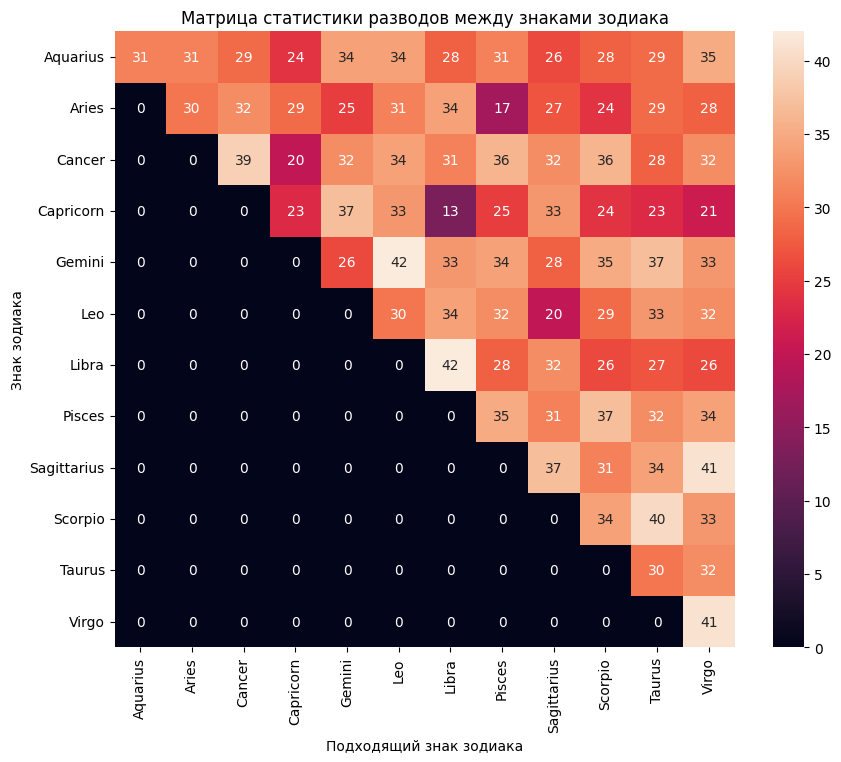

In [93]:
import numpy as np
zodiac_signs = np.unique(divorces[['zodiac_sign_man']])

# создаем пустую матрицу корреляции
corr_matrix = np.zeros((len(zodiac_signs), len(zodiac_signs)))


for i, sign1 in enumerate(zodiac_signs):
    for j, sign2 in enumerate(zodiac_signs):
        if i <= j:  # заполняем только верхнюю диагональ
            temp_df = divorces[(divorces['zodiac_sign_man'] == sign1) & (divorces['zodiac_sign_woman'] == sign2)]
            corr = int(temp_df.count()[0])
            corr_matrix[i, j] = corr    
# заполняем нижнюю диагональ, зеркально отражая верхнюю диагональ
corr_matrix += np.tril(corr_matrix, -1).T

import matplotlib.pyplot as plt
import seaborn as sns

# создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=zodiac_signs, yticklabels=zodiac_signs, annot=True)
plt.title('Матрица статистики разводов между знаками зодиака')
plt.xlabel('Подходящий знак зодиака')
plt.ylabel('Знак зодиака')
plt.show()

corr_matrix

df_corr = pd.DataFrame(corr_matrix, columns=zodiac_signs, index=zodiac_signs)

# используем метод stack()
df_stacked = df_corr.stack().reset_index()

# задаем названия колонок
df_stacked.columns = ['X', 'Y', 'correlation']

# выводим полученный датафрейм
#print(df_stacked)

n = corr_matrix.shape[0]
indices = np.triu_indices(n, k = 1)

# создаем DataFrame из выбранных значений
divorces_signs = pd.DataFrame({'X': df_corr.columns[indices[1]], 
                            'Y': df_corr.columns[indices[0]], 
                            'correlation': df_corr.values[indices]})

# выводим полученный датафрейм
#print(divorces_signs)

min_value = divorces_signs['correlation'].min()
divorces_signs['correlation'] = -1*divorces_signs['correlation'] #--(1/ (divorces_signs['correlation'])) * 10* min_value
divorces_signs['correlation'] = (divorces_signs['correlation'] - divorces_signs['correlation'].min()) / (divorces_signs['correlation'].max() - divorces_signs['correlation'].min())
df_compatibility_signs['correlation'] = (df_compatibility_signs['correlation'] - df_compatibility_signs['correlation'].min()) / (df_compatibility_signs['correlation'].max() - df_compatibility_signs['correlation'].min())

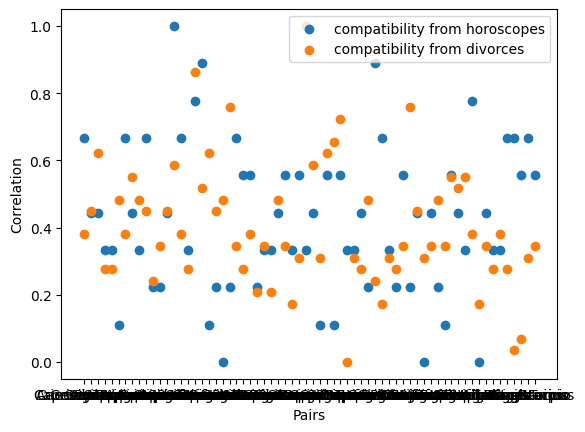

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Создаем DataFrame для примера

# Рисуем scatter plot
plt.scatter(df_compatibility_signs['X'] + df_compatibility_signs['Y'], df_compatibility_signs['correlation'], 
            label='compatibility from horoscopes')
plt.xlabel('Pairs')
plt.ylabel('Correlation')
plt.scatter(divorces_signs['X'] + divorces_signs['Y'], divorces_signs['correlation'], label='compatibility from divorces')
plt.legend()
plt.show()

Однако эти пары не очень красиво отображаются. Поэтому я хочу закодировать каждую пару знаков зодиака в натуральное число.

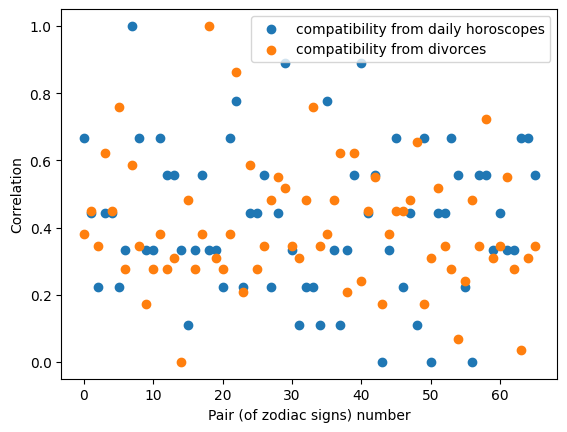

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Кодируем столбец X для обоих DataFrame
df_compatibility_signs['pair_number'] = le.fit_transform(df_compatibility_signs['X'] + ' ' + df_compatibility_signs['Y'])
divorces_signs['pair_number'] = le.transform(divorces_signs['X'] + ' ' + divorces_signs['Y'])



# Рисуем scatter plot
plt.scatter(df_compatibility_signs['pair_number'], 
            df_compatibility_signs['correlation'], label='compatibility from daily horoscopes')
plt.scatter(divorces_signs['pair_number'], divorces_signs['correlation'], label='compatibility from divorces')
plt.xlabel('Pair (of zodiac signs) number')
plt.ylabel('Correlation')
plt.legend()
plt.show()


Как видно из графика, разные датасеты дают абсолютно разную статистику по совместимости знаков. Это противоречит принципам астрологии, что звезды однозначно дают ответ для судьбы человека.

# Знак зодиака и уровень настроения

Теперь вернемся только к датасету еженедельных гороскопов. 
Принцип "общей" астрологии: успешность периода (полугодия\года) зависит от знака зодиака. Одним период сулит счастье, другим - более тяжелую судьбу.

Принцип "краткосрочной" астрологии: часто гороскопы сулят только [положительное](https://neurofied.com/barnum-effect-the-reason-why-we-believe-our-horoscopes/) будущее на краткосрочный период, чтобы успокоить человека, который его читает.

Но если астрология "работает", то противоречий быть не должно, и наверняка должны быть значительно "более" счастливые знаки зодиака и значительно "менее". Проверим на данных с июля 2022 года, как уровень предсказываемого настроения на неделю зависит от знака зодиака.

In [97]:
unique_moods = df['mood'].unique()


In [98]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # загрузка словаря для SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def happy_or_not(word):
    sentiment_dict = analyzer.polarity_scores(word)
    if sentiment_dict['compound'] >= 0.05:
      return 1
    elif sentiment_dict['compound'] <= -0.05:
      return -1
    else:
      return 0

# каждому настроению из датафрейма ставим в соответствие его класс 
# положительный: 1, нейтральный: 0, отрицательный: -1.
df['mood_class'] = df['mood'].apply(lambda x: happy_or_not(x))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


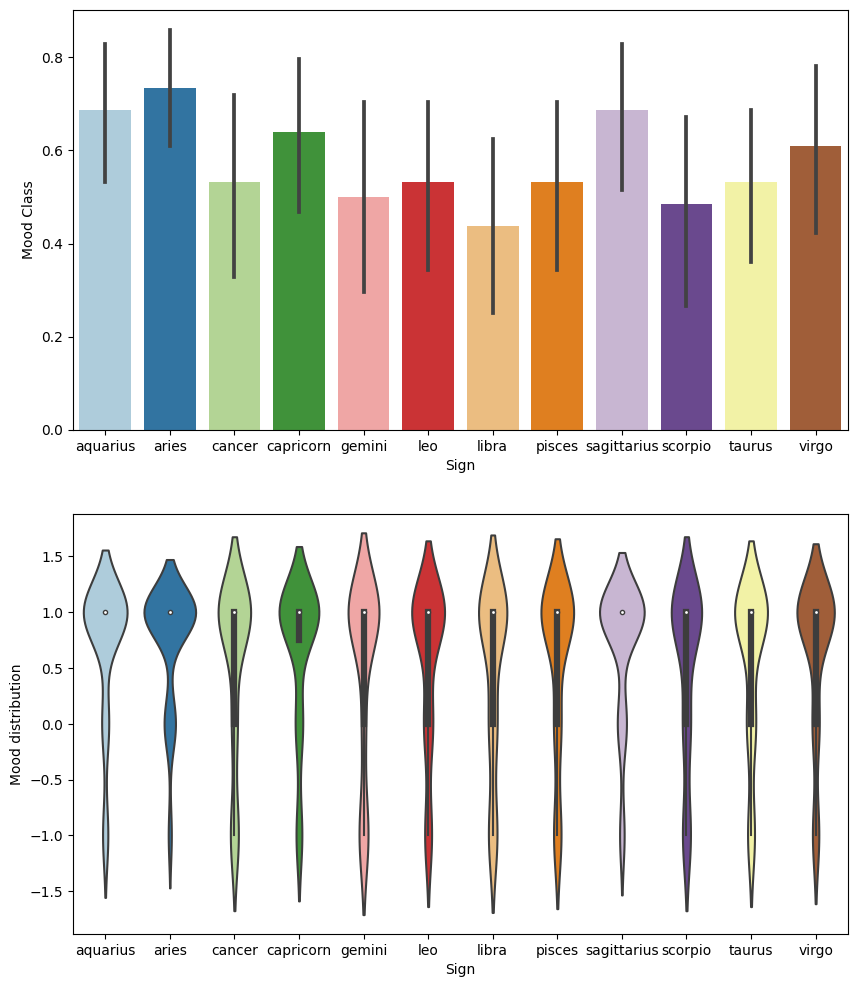

In [99]:
grouped = df.groupby('sign')['mood_class'].mean()


palette = sns.color_palette("Paired", len(grouped))

order = grouped.index.tolist()  # порядок значений столбца 'sign'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# первый график
sns.barplot(x='sign', y='mood_class', data=df, ax=ax1, palette=palette, order=order)
ax1.set_xlabel('Sign')
ax1.set_ylabel('Mood Class')

# второй график
sns.violinplot(x='sign', y='mood_class', data=df, ax=ax2, palette=palette, order=order)
ax2.set_xlabel('Sign')
ax2.set_ylabel('Mood distribution')

plt.show()

Как можно увидеть из графиков, знаки зодиака почти не отличаются друг от друга по предсказанным за 9 месяцев уровням настроения. Это противоречит другим же прогнозам астрологии, по которым какие-то знаки могут [проигрывать](https://tj.sputniknews.ru/20211101/znaki-zodiaka-2022-neudachi-1043146113.html), какие-то - выигрывать. Из данных нельзя получить подтверждение таким астрологическим прогнозам.

# Знаменитости: исторические данные и знаки зодиака

Что утверждает астрология? Знак зодиака определяет многое в твоей жизни. \\
Как это можно проверить? На исторических данных. Я беру два датасета, в одном есть знаменитые люди, их дата рождения и знак зодиака, в другом - знаменитости, их профессия, причина смерти, количество прожитых лет. \\
Я хочу проверить - влияет ли знак зодиака на такие важные показатели для человека как 1. продолжительность жизни. 2. причину смерти 3. профессию.

Для этого я беру два датасета:


[Первый](https://github.com/richard512/Little-Big-Data/blob/master/famous-birthdates.csv) - с датой рождения и знаками зодиака знаменитостей.

[Второй](https://www.kaggle.com/datasets/imoore/age-dataset) - с информацией о профессии, продолжительности жизни и причине смерти знаменитостей.



In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
# дата
import pandas as pd
famous_dates = pd.read_csv('famous_dates.csv', delimiter=' ')

famous_dates.head()

,name,lastname,firstname,articleNum,birthDate,birthMonth,birthDay,zodiac
1,Aaliyah,Aaliyah,NaN,0,1979-01-16,1.0,16.0,Capricorn
2,"Aaron, Hank",Aaron,Hank,46,1934-02-05,2.0,5.0,Aquarius
3,"Abacha, Sani",Abacha,Sani,2,1943-09-20,9.0,20.0,Virgo
4,"Abbado, Claudio",Abbado,Claudio,9,1933-06-26,6.0,26.0,Cancer
5,"Abbas, Mahmoud",Abbas,Mahmoud,306,1935-03-26,3.0,26.0,Aries


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download "imoore/age-dataset"
!unzip age-dataset.zip 

import pandas as pd

famous_occupation = pd.read_csv('/content/AgeDataset-V1.csv', delimiter=',')


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes
age-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  age-dataset.zip
replace AgeDataset-V1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: AgeDataset-V1.csv       


In [5]:

#kaggle datasets download -d imoore/age-dataset

#famous_occupation = pd.read_csv('famous_occupation.csv', delimiter=',')
famous_occupation['lastname'] = famous_occupation['Name'].str.split().str[-1]#['Name']
# создаем новый столбец 'firstname', если в строке больше 1 слова
famous_occupation.loc[famous_occupation['Name'].str.count(' ') > 0, 
                      'firstname'] = famous_occupation['Name'].str.split().str[0]
famous_occupation.head()


,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,lastname,firstname
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,Washington,George
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,Adams,Douglas
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,Lincoln,Abraham
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,Mozart,Wolfgang
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,Beethoven,Ludwig


Так как в python всегда возникают сложности с None и NaN, для того, чтобы подготовить датасеты к анализу, я воспользуюсь SQL.

In [102]:
import pandas as pd
import sqlite3

# подключение к базе данных
conn = sqlite3.connect(':memory:')
famous_dates.to_sql('famous_dates', conn, index=False)
famous_occupation.to_sql('famous_occupation', conn, index=False)

# выполнение запроса на создание таблицы
create_table_query = '''
create table famous
as select x.*, y.birthDate, y.birthMonth, y.birthDay, y.zodiac
from famous_occupation x
inner join famous_dates y
on 1=1
and x.firstname = y.firstname
and x.lastname = y.lastname
;
'''
conn.execute(create_table_query)

# запрос на выборку данных из таблицы
select_query = 'SELECT * FROM famous where [Occupation] is not null and zodiac is not null'
sign_occupation = pd.read_sql_query(select_query, conn)


select_query = 'SELECT * FROM famous where [Manner of death] is not null and zodiac is not null'
sign_death_reason = pd.read_sql_query(select_query, conn)

select_query = 'SELECT * FROM famous where [Age of death] is not null and zodiac is not null'
sign_death = pd.read_sql_query(select_query, conn)


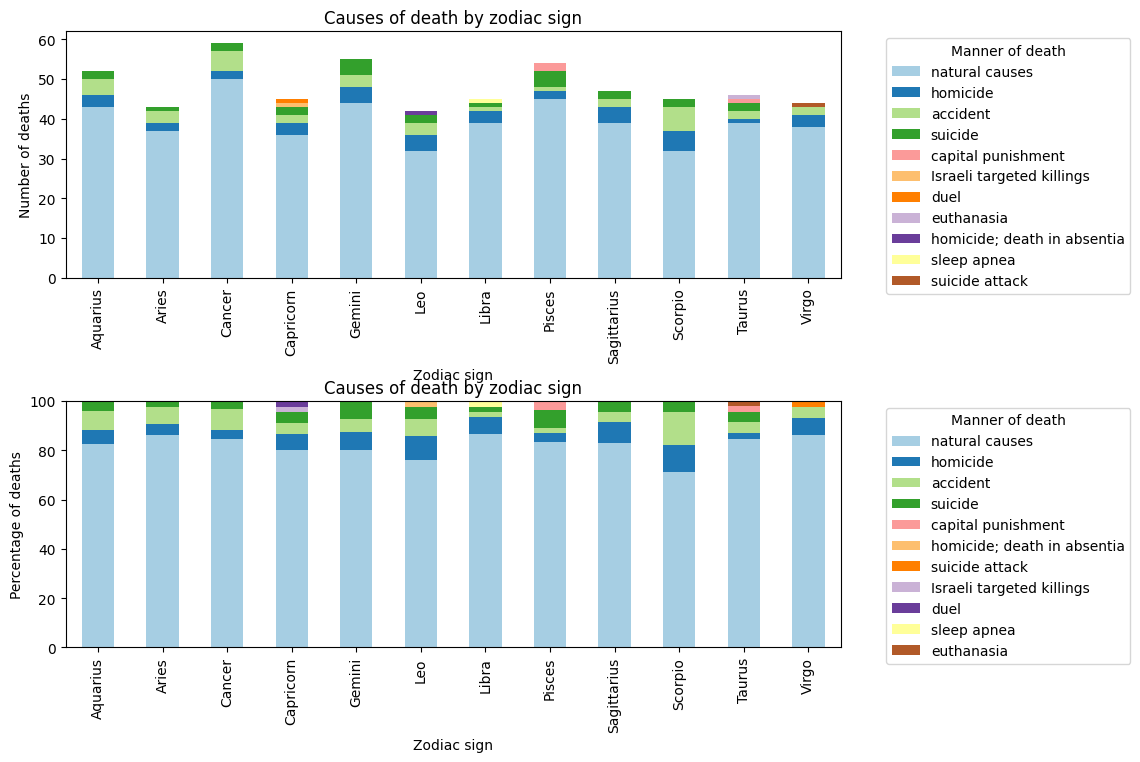

In [103]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

# первый подграфик - столбчатая диаграмма количества смертей
counts = sign_death_reason.groupby(['zodiac', 'Manner of death'])['Id'].count()
counts_df = counts.unstack(level=-1)
counts_df = counts_df.loc[:, counts_df.mean().sort_values(ascending=False).index]
counts_df.plot(kind='bar', stacked=True, colormap='Paired', ax=axs[0])
axs[0].set_xlabel('Zodiac sign')
axs[0].set_ylabel('Number of deaths')
axs[0].set_title('Causes of death by zodiac sign')
axs[0].legend(title='Manner of death', bbox_to_anchor=(1.05, 1), loc='upper left')

# второй подграфик - столбчатая диаграмма процентного соотношения количества смертей
total_deaths = sign_death_reason.groupby('zodiac')['Id'].count()
deaths_by_category = sign_death_reason.groupby(['zodiac', 'Manner of death'])['Id'].count().unstack()
normalized_data = (deaths_by_category.T / total_deaths).T * 100
normalized_data_df = normalized_data.loc[:, normalized_data.mean().sort_values(ascending=False).index]
normalized_data_df.plot(kind='bar', stacked=True, colormap='Paired', ax=axs[1])
axs[1].set_xlabel('Zodiac sign')
axs[1].set_ylabel('Percentage of deaths')
axs[1].set_title('Causes of death by zodiac sign')
axs[1].legend(title='Manner of death', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_ylim(top=100)

plt.show()

Графики показывают, что значительного перевеса в причинах смерти не наблюдается. Чтобы удостовериться в этом, я провожу тест хи-квадрат, чтобы сравнить выборочные пропорции доли причины natural cases среди разных знаков зодиака. Нулевая гипотеза о том, что знаки зодиака не влияют на причину смерти, проверяется на 5 % уровне значимости.

In [104]:
natural_causes = sign_death_reason[sign_death_reason['Manner of death'] == 'natural causes']

cause_sign = {}
natural_death_rate_general = len(natural_causes) / len(sign_death_reason)
# для каждого знака зодиака вычислить долю
for sign in sign_death_reason['zodiac'].unique():

    deaths_for_sign = sign_death_reason[sign_death_reason['zodiac'] == sign]
    natural_deaths_for_sign = natural_causes[natural_causes['zodiac'] == sign]
    #natural_death_rate = len(natural_deaths_for_sign) / len(deaths_for_sign)
    #cause_sign[sign, len(deaths_for_sign)] = natural_death_rate
    cause_sign[sign, len(deaths_for_sign)] = len(natural_deaths_for_sign)



In [105]:
import scipy
from scipy.stats import chi2_contingency
expected_death_counts = {sign: num * natural_death_rate_general for (sign, num) in cause_sign.keys()}
#expected_death_counts = {sign: natural_death_rate_general * expected_sign[sign] for sign in expected_sign}

# создаем двумерный массив, содержащий наблюдаемые и ожидаемые значения
observed_counts = [list(cause_sign.values())]
expected_counts = [list(expected_death_counts.values())]

# проводим тест хи-квадрат
chi2, p, dof, _ = chi2_contingency(observed_counts, expected_counts)

# вывести результаты теста
if p < 0.05:
    print("Гипотеза о том, что знаки зодиака не влияют на причину смерти в большинстве случаев, отвергается.")
else:
    print("Гипотеза о том, что знаки зодиака не влияют на причину смерти в большинстве случаев, не отвергается.")

Гипотеза о том, что знаки зодиака не влияют на причину смерти в большинстве случаев, не отвергается.


Причина смерти - естественная - наиболее популярная у всех знаков зодиака. Мы провели тест, чтобы вычислить, выбивается ли доля natural cases у какого-либо знака. Гипотеза, что вероятность такой смерти для всех знаков зодиака одинакова, не отвергается на 5 % уровне. 

Теперь аналогичный анализ проводим для профессии.


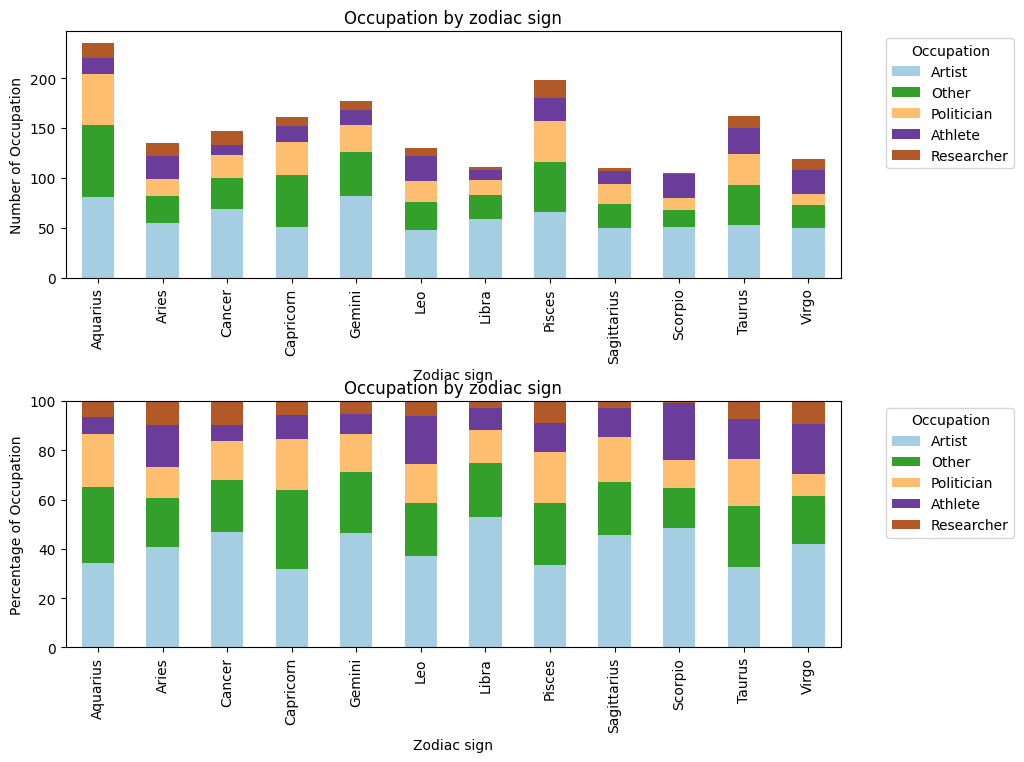

In [106]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)
top_occupations = sign_occupation['Occupation'].value_counts().head(4).index.tolist()

# заменим значения не входящие в топ на 'Other'
sign_occupation['occupation_other'] = sign_occupation['Occupation'].apply(lambda x: x if x in top_occupations else 'Other')
# первый подграфик - столбчатая диаграмма количества профессий
counts = sign_occupation.groupby(['zodiac', 'occupation_other'])['Id'].count()
counts_df = counts.unstack(level=-1)
counts_df = counts_df.loc[:, counts_df.mean().sort_values(ascending=False).index]
counts_df.plot(kind='bar', stacked=True, colormap='Paired', ax=axs[0])
axs[0].set_xlabel('Zodiac sign')
axs[0].set_ylabel('Number of Occupation')
axs[0].set_title('Occupation by zodiac sign')
axs[0].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# второй подграфик - столбчатая диаграмма процентного соотношения
total_occupations = sign_occupation.groupby('zodiac')['Id'].count()
occupations_by_category = sign_occupation.groupby(['zodiac', 'occupation_other'])['Id'].count().unstack()
normalized_data = (occupations_by_category.T / total_occupations).T * 100
normalized_data_df = normalized_data.loc[:, normalized_data.mean().sort_values(ascending=False).index]
normalized_data_df.plot(kind='bar', stacked=True, colormap='Paired', ax=axs[1])
axs[1].set_xlabel('Zodiac sign')
axs[1].set_ylabel('Percentage of Occupation')
axs[1].set_title('Occupation by zodiac sign')
axs[1].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_ylim(top=100)

plt.show()


Самая популярная профессия здесь - artist. Снова хи-квадрат тест проведем, теперь - для пропорций топ-4 по популярности профессий для данного датасета.

In [107]:
for i in ['Artist', 'Athlete', 'Politician', 'Researcher']:
  specific_occupation = sign_occupation[sign_occupation['occupation_other'] == i]

  cause_sign = {}
  natural_occupation_rate_general = len(specific_occupation) / len(sign_occupation) 
  for sign in sign_occupation['zodiac'].unique():

    occupations_for_sign = sign_occupation[sign_occupation['zodiac'] == sign]
    natural_rate_for_sign = specific_occupation[specific_occupation['zodiac'] == sign]
    #natural_death_rate = len(natural_deaths_for_sign) / len(deaths_for_sign)
    #cause_sign[sign, len(deaths_for_sign)] = natural_death_rate
    cause_sign[sign, len(occupations_for_sign)] = len(natural_rate_for_sign)

  import scipy
  from scipy.stats import chi2_contingency
  expected_occupation_counts = {sign: num * natural_occupation_rate_general for (sign, num) in cause_sign.keys()}

  observed_counts = [list(cause_sign.values())]
  expected_counts = [list(expected_occupation_counts.values())]

  chi2, p, dof, _ = chi2_contingency(observed_counts, expected_counts)

  if p < 0.05:
    print(f"Гипотеза о том, что знаки зодиака не влияют на выбор профессии {i} в большинстве случаев, отвергается.")
  else:
    print(f"Гипотеза о том, что знаки зодиака не влияют на выбор профессии {i} в большинстве случаев, не отвергается.")

Гипотеза о том, что знаки зодиака не влияют на выбор профессии Artist в большинстве случаев, не отвергается.
Гипотеза о том, что знаки зодиака не влияют на выбор профессии Athlete в большинстве случаев, не отвергается.
Гипотеза о том, что знаки зодиака не влияют на выбор профессии Politician в большинстве случаев, не отвергается.
Гипотеза о том, что знаки зодиака не влияют на выбор профессии Researcher в большинстве случаев, не отвергается.


Таким образом, нулевая гипотеза не опроверглась. 

Остался прогноз продолжительности жизни по знаку зодиака. Так как в датасете есть информация по гендеру и дате рождения, я буду использовать их в качестве признаков тоже.

Чтобы было с чем сравнивать полученный MSE, я подготовлю вторую модель, где вместо знака зодиака будет месяц рождения. Так как месяц только частично указывает на знак зодиака, то при замене знака на месяц, при наличии значимой информативности знака зодиака, MSE должен сильно увеличиться.

In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# выделить признаки (features)
X = sign_death[['zodiac', 'Birth year', 'Gender']]

# выделить целевую переменную (target)
y = sign_death['Age of death']

# преобразовать категориальный признак 'zodiac' в бинарные признаки
X = pd.get_dummies(X, columns=['zodiac', 'Gender'])

# создать объект модели LinearRegression
model = LinearRegression()

# выполнить кросс-валидацию на 5 фолдах и оценить качество модели с помощью метрики MSE
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# вывести среднее значение MSE
print('MSE для признака знак зодиака:', np.mean(-scores))


# выделить признаки (features)
X = sign_death[['birthMonth', 'Birth year', 'Gender']]

# выделить целевую переменную (target)
y = sign_death['Age of death']

X = pd.get_dummies(X, columns=[ 'Gender'])

# создать объект модели LinearRegression
model = LinearRegression()

# выполнить кросс-валидацию на 5 фолдах и оценить качество модели с помощью метрики MSE
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# вывести среднее значение MSE
print('MSE для признака месяц рождения:', np.mean(-scores))

MSE для признака знак зодиака: 265.55024205138216
MSE для признака месяц рождения: 264.63483329458256


Таким образом, при замене знака зодиака на месяц рождения MSE score практически не изменяется. Значит, знак зодиака не является настолько значимой компонентой судьбы человека, как это замечают астрологи.

# Capybara Daily Horoscope

[Ну, и какой финальный проект по астрологии без гороскопа на сегодня для 
грейдеров! Представляю вам самый точный и самый научный гороскоп - какая капибара вы сегодня.
Прикрепляю ссылку на streamlit.](https://spirogovaa-final-project-hse-nes-flex-ush8z4.streamlit.app/)
В случае, если она не сработает, код есть ниже!

In [109]:
import requests
import json
from bs4 import BeautifulSoup

url = 'https://prowritingaid.com/art/2299/positive-adjectives.aspx'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    
    adjectives = []
    for li in soup.find_all('li'):
        adjective = li.get_text().strip()
        if adjective:
            adjectives.append(adjective)
    
    # Выводим список прилагательных на экран
else:
    print('Произошла ошибка при загрузке страницы')

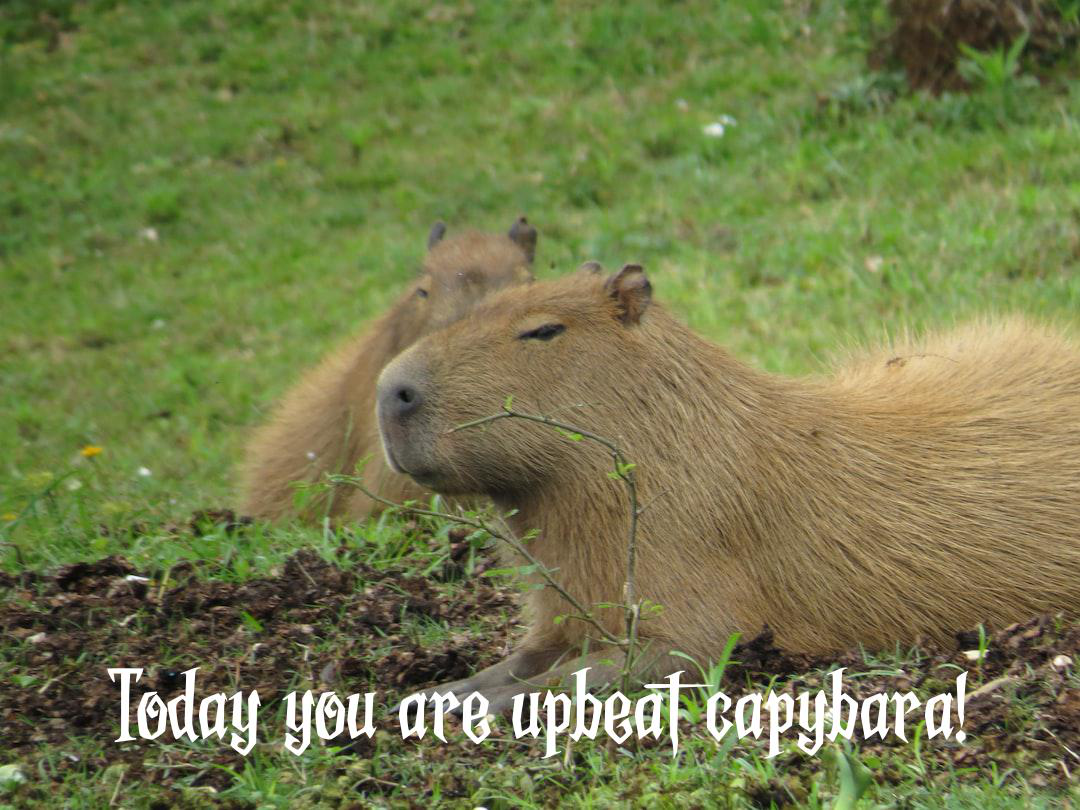

In [110]:

ACCESS_KEY = 'l8L7RtHq3zRZhCX3mAsCDek0MHx7G64LcQPAzb8sPxY'

import requests
import json
import random
import urllib.request
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


filtered_adjectives = [adj for adj in adjectives if ':' in adj]

new_adjectives = [adj.split(':')[0] for adj in filtered_adjectives]

new_adjectives = [adj.split(':')[0] for adj in filtered_adjectives 
                  if not adj.split(':')[0].isspace() and ' ' not in adj.split(':')[0]]


random_adjective = random.choice(new_adjectives)

#query = f'{random_adjective} capybara'
query = 'capybara'
orientation = 'landscape'
per_page = 10

#response = requests.get(f'https://api.unsplash.com/search/photos?query={query}&orientation={orientation}&per_page=1&client_id={ACCESS_KEY}')
#total_results = json.loads(response.text)['total']

# выбираем случайную страницу результатов
page = random.randint(1, 2)

# отправляем запрос на API выбранной страницы
response = requests.get(f'https://api.unsplash.com/search/photos?query={query}&orientation={orientation}&per_page={per_page}&page={page}&client_id={ACCESS_KEY}')

# получаем результат в формате JSON
result = json.loads(response.text)



# выбираем случайное изображение
photo = random.choice(result['results'])

# скачиваем и сохраняем фотографию
urllib.request.urlretrieve(photo['urls']['regular'], "example.jpg")

# открываем сохраненную фотографию
img = Image.open('example.jpg')

# Определяем размеры изображения
width, height = img.size

# Создаем объект ImageDraw и ImageFont
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("midnight.otf", 77)

# Создаем текст для вывода на изображении
text = f"Today you are {random_adjective.lower()} capybara!"

# Определяем размеры текста
text_width, text_height = draw.textsize(text, font=font)

# Рассчитываем координаты вывода текста
x = (width - text_width) / 2
y = height - text_height - 50

# Добавляем текст на изображение
draw.text((x, y), text, font=font, fill=(255, 255, 255))

# Сохраняем изображение с текстом
img.save('example_with_text.jpg')

# Открываем сохраненное изображение с текстом
img_with_text = Image.open('example_with_text.jpg')
img_with_text.show()


